# Kernel SVC Examples

+ Using synthetic, non-linearly separable datasets

### Packages

In [1]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# modeling packages
import scipy.stats as stats
from sklearn.datasets import make_moons, make_circles
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from mlutils import plot_svc_decision_boundary, plot_predictions, plot_classes

### Display Settings

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

### Data Generation

[Text(0, 0.5, '$x_2$'), Text(0.5, 0, '$x_1$')]

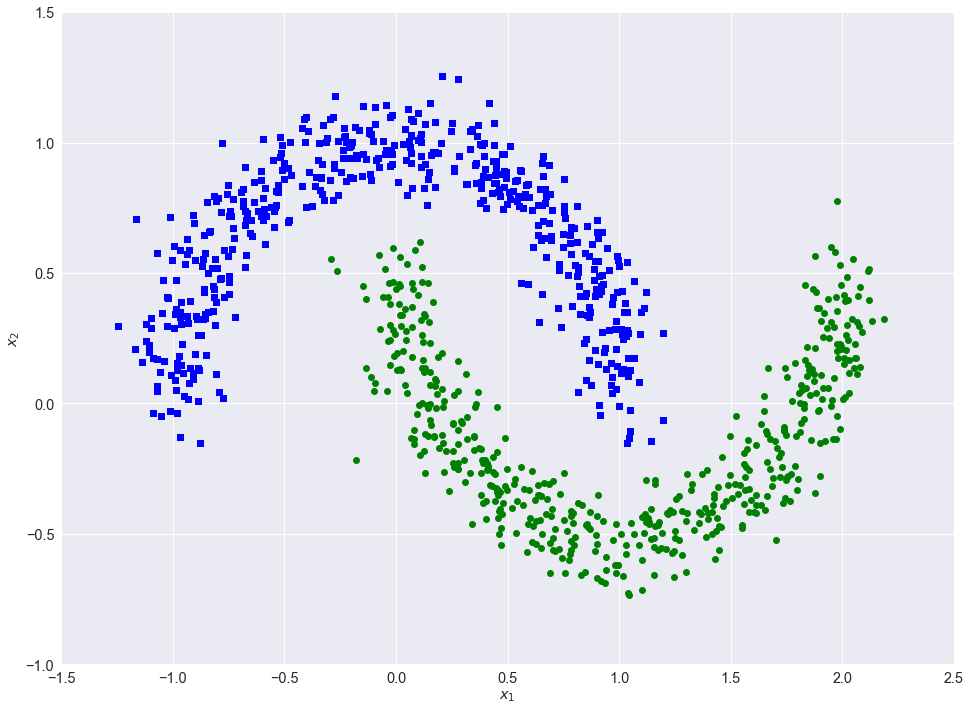

In [3]:
X, y = make_moons(n_samples=1000, noise=0.10, random_state=123)

axlim = [-1.5, 2.5, -1, 1.5]

# plot the generated 2D data
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

plot_classes(X, y, ax, axlim)
ax.set(xlabel=r"$x_1$", ylabel= r"$x_2$")

### Polynomial SVC Fit

We fit a linear SVM classifier model using only two attributes, and for only two classes

In [4]:
poly_svc = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=123))
    ])
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=123, tol=0.0001, verbose=0))])

We plot the data and the decision boundaries for the two features

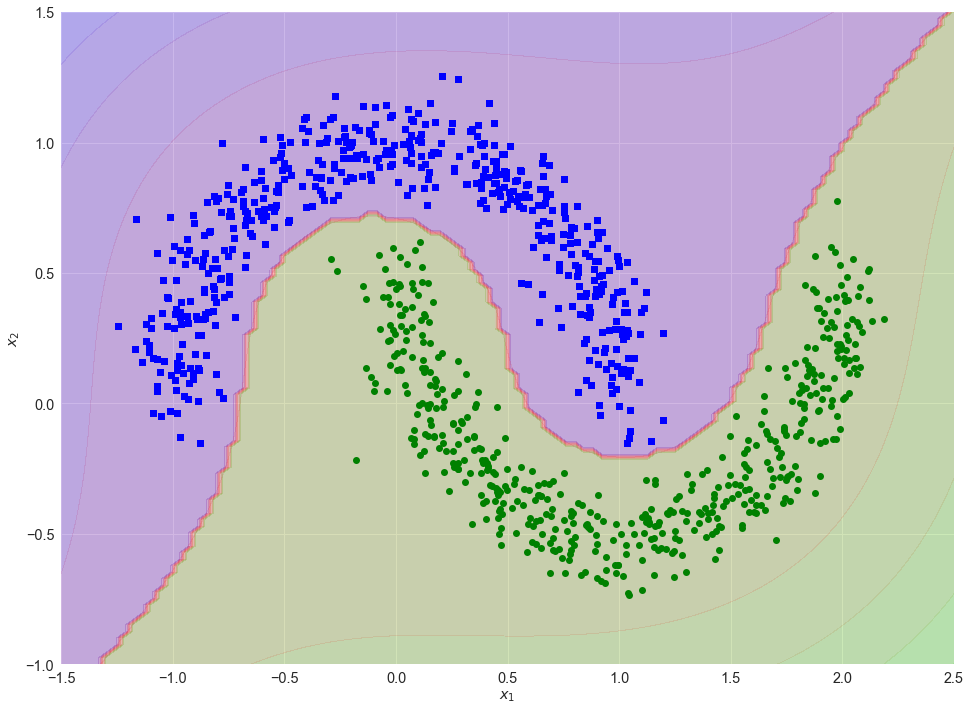

In [5]:
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

plot_classes(X, y, ax, axlim)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
plot_predictions(poly_svc, ax, axlim)

### Kernel SVC

In [6]:
rbf_kernel_svc = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

We fit and plot the above model for four different combinations of hyperparameters $\gamma$ and $C$

<Figure size 1080x720 with 0 Axes>

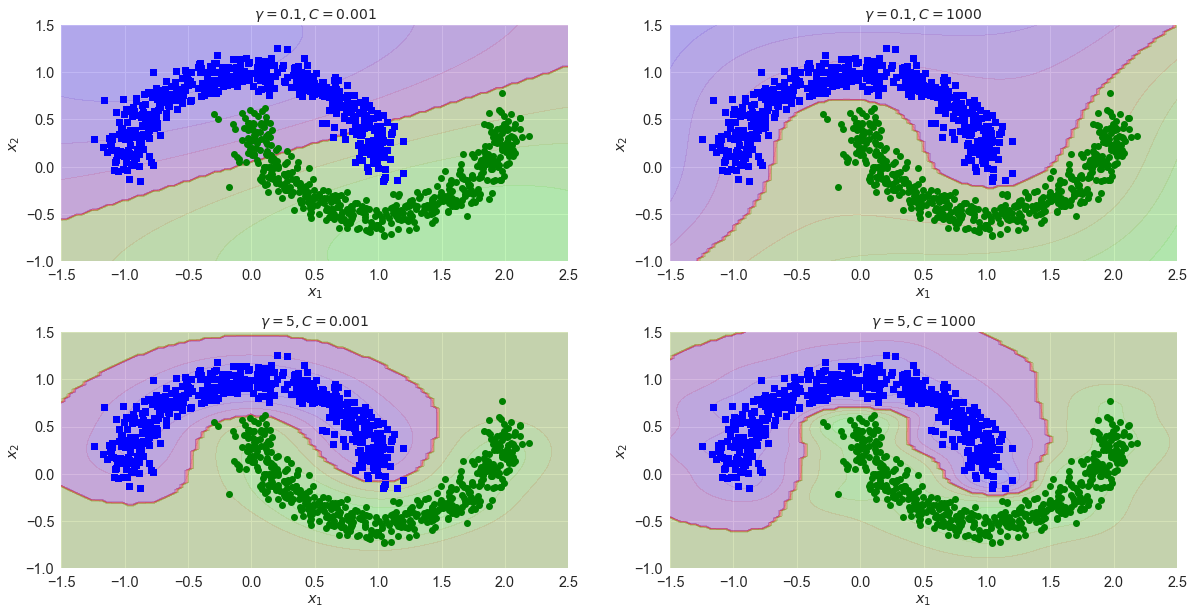

In [7]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svcs = []
for gamma, C in hyperparams:
    rbf_kernel_svc = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svc.fit(X, y)
    svcs.append(rbf_kernel_svc)
    
plt.figure(figsize=(15, 10))

# plot the four models
fig = plt.figure()
for i, svc in enumerate(svcs):
    ax = fig.add_subplot(221 + i)
    plot_predictions(svc, ax, axlim)
    plot_classes(X, y, ax, axlim)
    ax.set(xlabel=r"$x_1$", ylabel= r"$x_2$")
    gamma, C = hyperparams[i]
    plt.subplots_adjust(hspace=0.3)    
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=14)

plt.show()